# Gender and Age Prediction

## Import Dependencies

In [15]:
import cv2 as cv
import math
import time
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Face Detection

In [5]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(
        frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False
    )

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(
                frameOpencvDnn,
                (x1, y1),
                (x2, y2),
                (0, 255, 0),
                int(round(frameHeight / 150)),
                8,
            )
    return frameOpencvDnn, bboxes

<IPython.core.display.Javascript object>

## Pre-Trained Model

**Main Credits For Pretrained Model :**
- [faceProto](https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/opencv_face_detector.pbtxt)
- [faceModel](https://github.com/spmallick/learnopencv/blob/master/AgeGender/opencv_face_detector_uint8.pb)

- [ageProto](https://github.com/spmallick/learnopencv/blob/master/AgeGender/age_deploy.prototxt)
- [ageModel](https://github.com/GilLevi/AgeGenderDeepLearning/blob/master/models/age_net.caffemodel)

- [genderProto](https://github.com/spmallick/learnopencv/blob/master/AgeGender/gender_deploy.prototxt)
- [genderModel](https://github.com/eveningglow/age-and-gender-classification/blob/master/model/gender_net.caffemodel)

In [9]:
faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = [
    "(0-2)",
    "(4-6)",
    "(8-12)",
    "(15-20)",
    "(25-32)",
    "(38-43)",
    "(48-53)",
    "(60-100)",
]
genderList = ["Male", "Female"]

<IPython.core.display.Javascript object>

In [12]:
# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)
padding = 20

<IPython.core.display.Javascript object>

## Age & Gender Detection

In [30]:
def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[
            max(0, bbox[1] - padding) : min(bbox[3] + padding, frame.shape[0] - 1),
            max(0, bbox[0] - padding) : min(bbox[2] + padding, frame.shape[1] - 1),
        ]

        blob = cv.dnn.blobFromImage(
            face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False
        )
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        #         print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{} , {}".format(gender, age)
        cv.putText(
            frameFace,
            label,
            (bbox[0], bbox[1] - 10),
            cv.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 255, 255),
            2,
            cv.LINE_AA,
        )
    return frameFace

<IPython.core.display.Javascript object>

## Make Prediction

In [31]:
def show_results(img_path):
    img = cv.imread(img_path)
    output = age_gender_detector(img)
    rgb_output = cv.cvtColor(output, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_output)
    plt.show()

<IPython.core.display.Javascript object>

Gender : Male, conf = 0.995
Age : (8-12), conf = 0.757


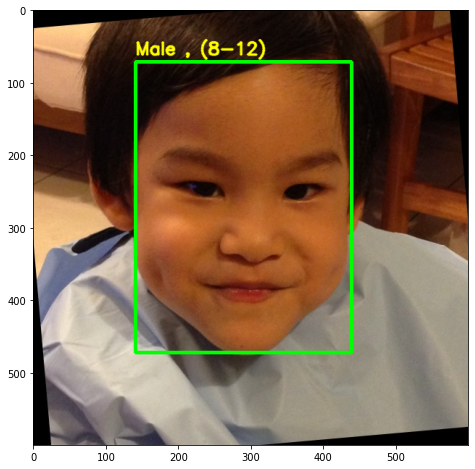

<IPython.core.display.Javascript object>

In [32]:
show_results("image1.jpg")

Gender : Female, conf = 0.991
Age : (25-32), conf = 0.733


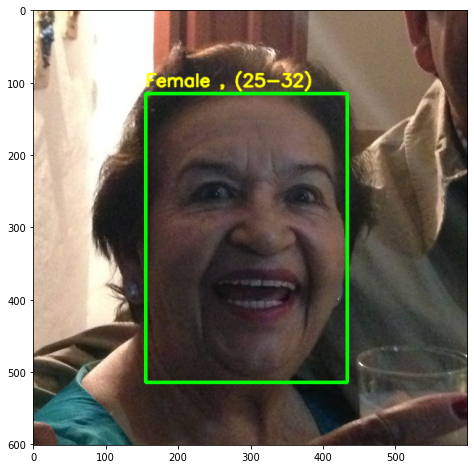

<IPython.core.display.Javascript object>

In [33]:
show_results("image3.jpg")

Gender : Male, conf = 0.962
Age : (0-2), conf = 0.991


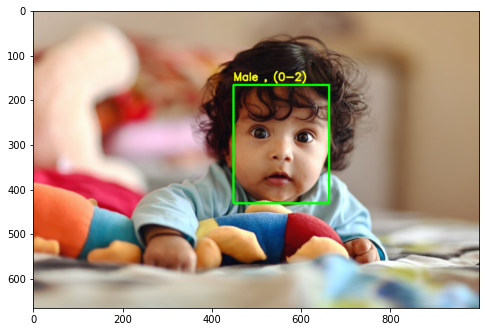

<IPython.core.display.Javascript object>

In [36]:
show_results("image4.jpeg")

Gender : Male, conf = 0.991
Age : (60-100), conf = 0.968


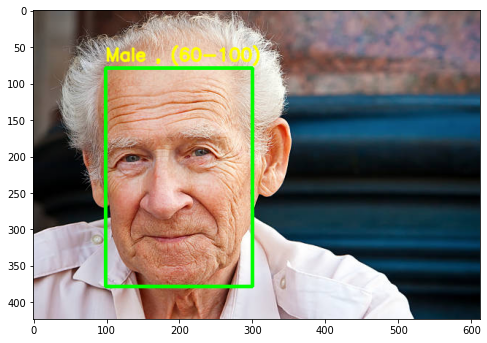

<IPython.core.display.Javascript object>

In [39]:
show_results("image5.jpg")

## Testing On Your Image

In [40]:
show_results("your_image_path")

<IPython.core.display.Javascript object>